# DATA 606 Capstone Project

## Part 2: Bail Amount Prediction

**Author:** Snigdha Panakanti

**Term:** Summer 2023

Data Extraction:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt

In [2]:
# Set table view
pd.set_option('display.max_columns', None)

In [3]:
# Import .csv
df = pd.read_csv('/content/PretrialReleaseDataExtractWeb.csv')
df.shape

(284098, 108)

In [4]:
# Column names
df.columns

Index(['Internal_Case_ID', 'Gender', 'Race', 'Ethnicity', 'Age_at_Crime',
       'Age_at_Arrest', 'Court_Name', 'Court_ORI', 'County_Name', 'District',
       ...
       'prior_misd_cnt', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
       'rearrest', 'rearrest_date', 'rearrest_firearm',
       'rearrest_date_firearm', 'arr_cycle_id'],
      dtype='object', length=108)

In [5]:
# Remove extraneous features
# Features to remove
remove_col = ['Court_Name','County_Name', 'District', 'Region', 'Court_Type',
          'Warrant_Ordered_btw_Arraign_and_Dispo', 'DAT_WO_WS_Prior_to_Arraign',
          'First_Bench_Warrant_Date', 'Non_Stayed_WO', 'Num_of_Stayed_WO', 'Num_of_ROW',
          'Docket_Status', 'Disposition_Type', 'Disposition_Detail', 'Dismissal_Reason',
          'Disposition_Date', 'Most_Severe_Sentence', 'Top_Conviction_Law', 'Top_Conviction_Article_Section',
          'Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction', 'Top_Charge_Severity_at_Conviction',
          'Top_Charge_Weight_at_Conviction', 'Top_Charge_at_Conviction_Violent_Felony_Ind',
          'Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody', 'Days_Arraign_Bail_Set_to_First_Posted',
          'Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
          'rearrest', 'rearrest_date', 'rearrest_firearm', 'rearrest_date_firearm', 'arr_cycle_id','Partially_Secured_App_Bond_Perc', 'Bail_Made_Indicator',
          'First_Arraign_Date', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign',
          'Partially_Secured_Surety_Bond_Perc', 'Top_Arrest_Law', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Arraign_Attempt_Indicator',
          'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind',
          'Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender',
          'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School', 'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
          'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR', 'Order_of_Protection', "Representation_at_Securing_Order",
          'App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total',
          'Top_Arrest_Attempt_Indicator','Case_Type']

In [6]:
df = df.drop(labels=remove_col, axis=1)
bail_amt = pd.DataFrame(df)

In [7]:
bail_amt.head()

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_ORI,Judge_Name,Offense_Date,Arrest_Date,Arrest_Type,Top_Arrest_Article_Section,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind,Arraign Charge Category,Representation_Type,Def_Attended_Sched_Pretrials,Release Decision at Arraign,First_Bail_Set_Cash,First_Bail_Set_Credit,First_Insurance_Company_Bail_Bond,First_Secured_Surety_Bond,First_Secured_App_Bond,First_Unsecured_Surety_Bond,First_Unsecured_App_Bond,First_Partially_Secured_Surety_Bond,First_Partially_Secured_App_Bond,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt
0,0x866BC1A9D02C2D5D8C5E012A1263CBCB186AAD4EC432...,Female,White,Unknown,32.0,0.0,NY040033J,"Novillo, Edwin I.",NaN,NaN,Custody,NaN,NaN,NaN,NaN,N,Criminal Contempt,Legal Aid,3,ROR,,,,,,,,,,0.0,0.0,0.0
1,0x19CE12EEBB600591525A623342A703545C8217AECBED...,Male,Black,Non Hispanic,38.0,38.0,NY030033J,"Clynes, James G.",11/1/2019,11/1/2019,DAT,120,PL 120.00 01 AM Aslt 3-W/Int Cause Phys Injury,Misdemeanor,AM,N,Assault,Public Defender,,ROR,,,,,,,,,,0.0,0.0,0.0
2,0xF7CC1FA4C28B406C23DB333B96623EE4B85C447CA524...,Male,Unknown,Unknown,31.0,31.0,NY033011J,"Limpert, Theodore H.",4/1/2017,4/1/2017,DAT,511,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N,Unlicensed Operation,18B (Assigned Counsel),,ROR,,,,,,,,,,NaN,NaN,NaN
3,0x6D65E9BD03FE9F08760481FD325804F8F74FF2C874E1...,Unknown,Unknown,Unknown,28.0,28.0,NY032011J,"Amoroso, Gregory J.",4/1/2017,4/1/2017,Custody,511,VTL 0511 01A UM Aggravated Unlic Oper Veh-3rd,Misdemeanor,UM,N,Unlicensed Operation,Public Defender,,Disposed at arraign,,,,,,,,,,NaN,NaN,NaN
4,0xB9F29E48ABC1069053C191061BB6B3B0792DBCD96FD1...,Male,White,Non Hispanic,36.0,36.0,NY030033J,"Thompson, Ann D.",1/1/2020,1/1/2020,Custody,155.25,PL 155.25 AM Petit Larceny,Misdemeanor,AM,N,Larceny,Legal Aid,,Nonmonetary release,,,,,,,,,,0.0,1.0,10.0


In [8]:
bail_amt.shape

(284098, 32)

In [9]:
bail_amt.columns

Index(['Internal_Case_ID', 'Gender', 'Race', 'Ethnicity', 'Age_at_Crime',
       'Age_at_Arrest', 'Court_ORI', 'Judge_Name', 'Offense_Date',
       'Arrest_Date', 'Arrest_Type', 'Top_Arrest_Article_Section',
       'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest',
       'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'First_Bail_Set_Cash',
       'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
       'First_Secured_Surety_Bond', 'First_Secured_App_Bond',
       'First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond',
       'First_Partially_Secured_Surety_Bond',
       'First_Partially_Secured_App_Bond', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt'],
      dtype='object')

In [10]:
# Dropping Nans

bail_amt = df.dropna(subset=["Internal_Case_ID","Gender","Race","Top_Charge_Severity_at_Arrest"])
bail_amt.isna().sum()

Internal_Case_ID                               0
Gender                                         0
Race                                           0
Ethnicity                                      0
Age_at_Crime                                   0
Age_at_Arrest                                  0
Court_ORI                                      0
Judge_Name                                     0
Offense_Date                                  91
Arrest_Date                                 3018
Arrest_Type                                    0
Top_Arrest_Article_Section                     5
Top_Charge_at_Arrest                           0
Top_Charge_Severity_at_Arrest                  0
Top_Charge_Weight_at_Arrest                    0
Top_Charge_at_Arrest_Violent_Felony_Ind        0
Arraign Charge Category                        0
Representation_Type                        16770
Def_Attended_Sched_Pretrials                   0
Release Decision at Arraign                    0
First_Bail_Set_Cash 

In [11]:
# Replacing spaces with 0's
bail_amt.eq(" ").sum()
bail_amt = bail_amt.replace(" ", 0)
bail_amt.eq(" ").sum()

Internal_Case_ID                           0
Gender                                     0
Race                                       0
Ethnicity                                  0
Age_at_Crime                               0
Age_at_Arrest                              0
Court_ORI                                  0
Judge_Name                                 0
Offense_Date                               0
Arrest_Date                                0
Arrest_Type                                0
Top_Arrest_Article_Section                 0
Top_Charge_at_Arrest                       0
Top_Charge_Severity_at_Arrest              0
Top_Charge_Weight_at_Arrest                0
Top_Charge_at_Arrest_Violent_Felony_Ind    0
Arraign Charge Category                    0
Representation_Type                        0
Def_Attended_Sched_Pretrials               0
Release Decision at Arraign                0
First_Bail_Set_Cash                        0
First_Bail_Set_Credit                      0
First_Insu

In [12]:
# Creating a new Column for bail amount

bail_amt_cols = ['First_Bail_Set_Cash',
       'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
       'First_Secured_Surety_Bond', 'First_Secured_App_Bond',
       'First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond',
       'First_Partially_Secured_Surety_Bond',
       'First_Partially_Secured_App_Bond']

In [13]:
for c in bail_amt_cols:
    s = bail_amt[c].str.strip()
    bail_amt[c] = pd.to_numeric(s)

In [14]:
for c in bail_amt_cols:
    bail_amt[c].fillna(value=0, inplace=True)

In [15]:
# Replacing Nan values with max value
bail_amt["Bail_Amount"] = bail_amt[bail_amt_cols].max(axis=1)

In [16]:
bail_amt = bail_amt.drop(bail_amt_cols, axis=1)

In [17]:
# Creating a column for Age
bail_amt["Age"] = bail_amt[["Age_at_Crime", "Age_at_Arrest"]].max(axis=1)

In [18]:
# Converting Gender into Boolean
# Dropping "unknown" gender
gender_filter = (bail_amt["Gender"]!="Unknown")
bail_amt = bail_amt[gender_filter]

bail_amt["Gender"] = np.where(bail_amt["Gender"] == "male", 0, 1)

In [19]:
# Converting violent felony into Boolean
bail_amt["Violent_Fel"] = np.where(bail_amt["Top_Charge_at_Arrest_Violent_Felony_Ind"] == "N", 0, 1)

In [20]:
# Dropping Internal case ID column
bail_amt = bail_amt.drop(["Internal_Case_ID"],axis=1)

In [21]:
# Bail Filter ( Only want to include cases where bail was assigned)
bail_filter = (bail_amt["Release Decision at Arraign"] == "Bail-set")
bail_amt = bail_amt[bail_filter]

In [22]:
# Select years between 2018-2021
bail_amt["Arrest_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')
bail_amt["Offense_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')

bail_amt["Arrest_Date"] = pd.DatetimeIndex(bail_amt["Arrest_Date"]).year
bail_amt["Offense_Date"] = pd.DatetimeIndex(bail_amt["Offense_Date"]).year


<ipython-input-22-1e986874f042>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bail_amt["Arrest_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')
<ipython-input-22-1e986874f042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bail_amt["Offense_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')
<ipython-input-22-1e986874f042>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [23]:
dates = ["Arrest_Date","Offense_Date"]

In [24]:
bail_amt["Year"] = bail_amt[dates].max(axis=1)

<ipython-input-24-613042eb9755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bail_amt["Year"] = bail_amt[dates].max(axis=1)


In [25]:
bail_amt = bail_amt.dropna()

In [26]:
year_filter = (bail_amt["Year"]>=2018)
bail_amt = bail_amt[year_filter]

In [27]:
bail_amt = bail_amt.drop(["Arrest_Date","Offense_Date"],axis=1)

In [28]:
bail_amt['Race'] = np.where(bail_amt['Ethnicity'] == "Hispanic", "Hispanic", bail_amt['Race'])
bail_amt = bail_amt.drop('Ethnicity', axis=1)

In [29]:
final_bail_amt = pd.DataFrame(bail_amt)

In [30]:
final_bail_amt.columns

Index(['Gender', 'Race', 'Age_at_Crime', 'Age_at_Arrest', 'Court_ORI',
       'Judge_Name', 'Arrest_Type', 'Top_Arrest_Article_Section',
       'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest',
       'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'Bail_Amount', 'Age', 'Violent_Fel', 'Year'],
      dtype='object')

Descriptive Statistics

In [31]:
final_bail_amt.columns

Index(['Gender', 'Race', 'Age_at_Crime', 'Age_at_Arrest', 'Court_ORI',
       'Judge_Name', 'Arrest_Type', 'Top_Arrest_Article_Section',
       'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest',
       'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'Bail_Amount', 'Age', 'Violent_Fel', 'Year'],
      dtype='object')

<Axes: title={'center': 'Bail_Amount'}, xlabel='[Arraign Charge Category]'>

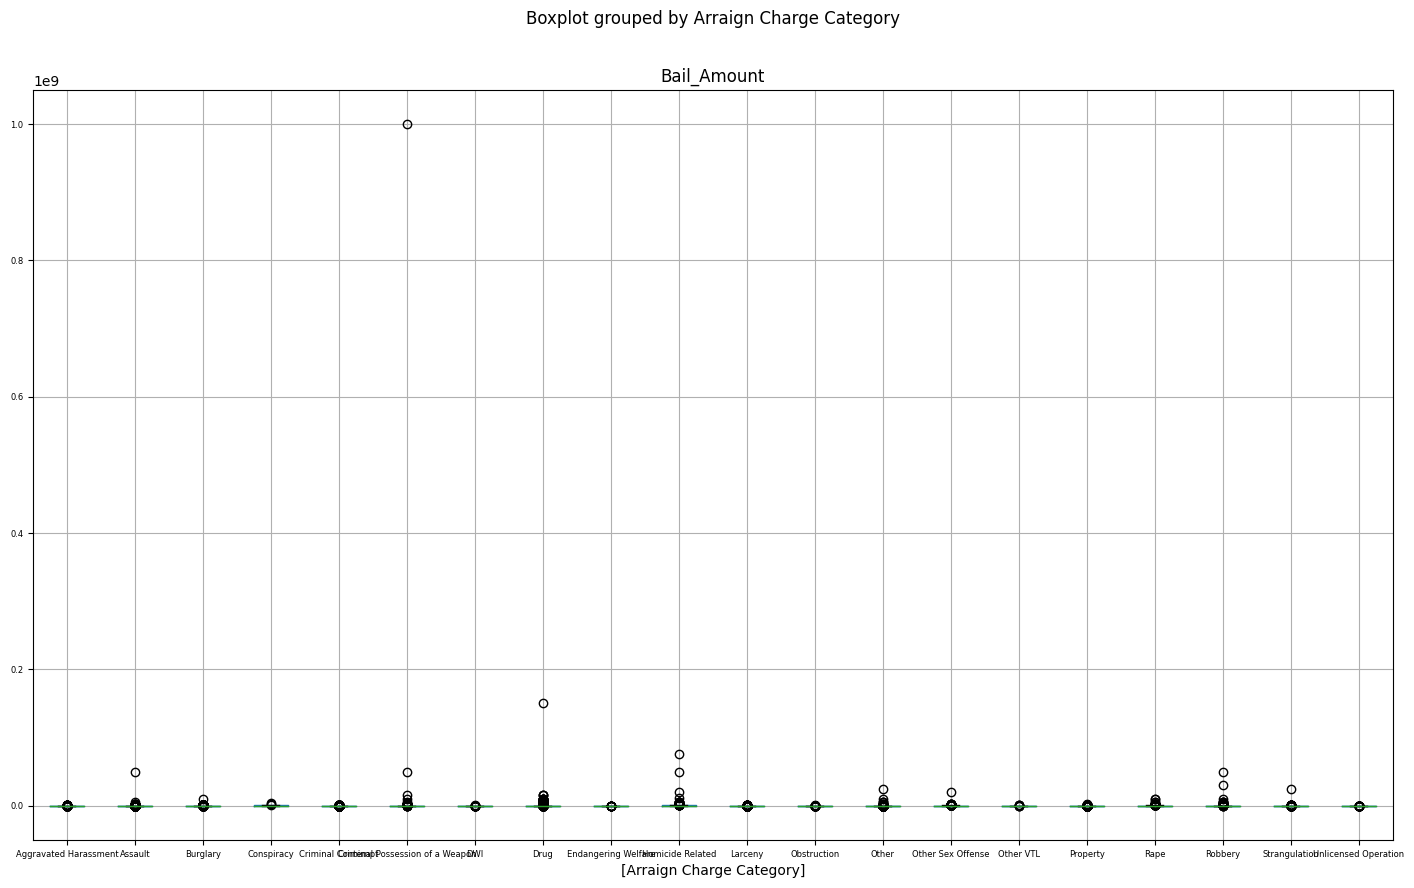

In [32]:
final_bail_amt.boxplot(column=["Bail_Amount"], by=["Arraign Charge Category"], fontsize=6, figsize=(17,10))

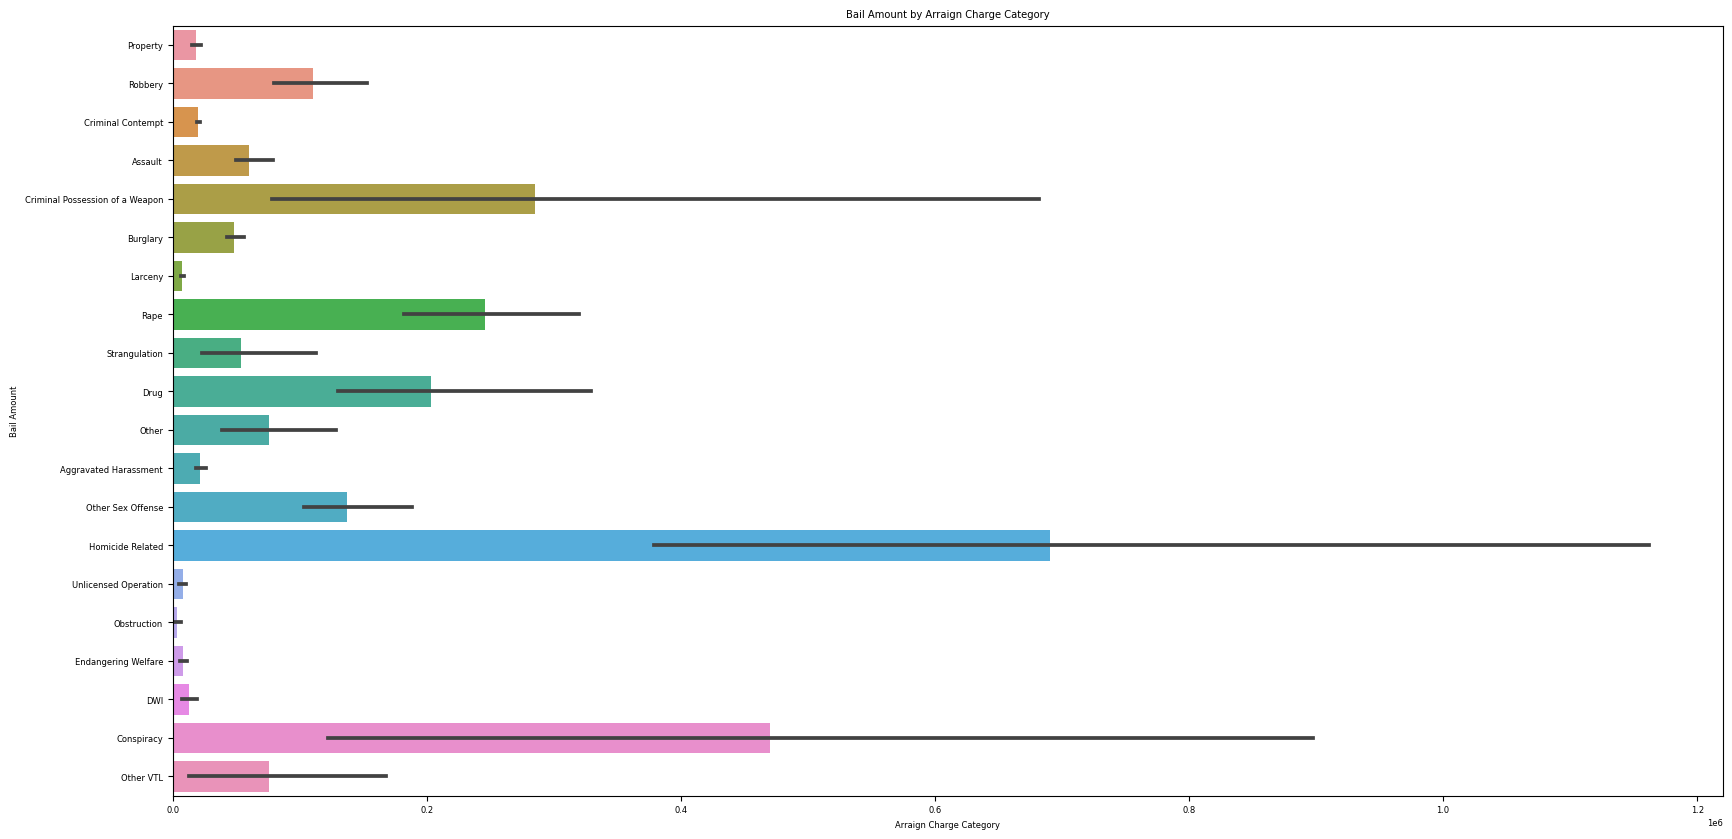

In [33]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 6})
sns.barplot(data=final_bail_amt, y="Arraign Charge Category", x="Bail_Amount")
plt.xlabel("Arraign Charge Category")
plt.ylabel("Bail Amount")
plt.title("Bail Amount by Arraign Charge Category")
plt.show()

<Axes: xlabel='Bail_Amount', ylabel='Arraign Charge Category'>

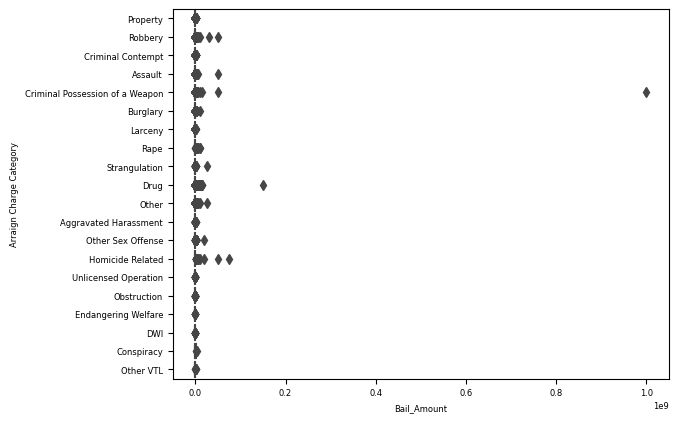

In [34]:
sns.boxplot(x=final_bail_amt["Bail_Amount"], y=final_bail_amt["Arraign Charge Category"])

In [35]:
crime = final_bail_amt[["Bail_Amount","Arraign Charge Category"]]

In [36]:
crime.groupby(["Arraign Charge Category"]).agg(["count","min","median","max","mean","std"])

Bail_Amount                                 \
                                      count     min    median          max   
Arraign Charge Category                                                      
Aggravated Harassment                   764     1.0    7500.0     600000.0   
Assault                                6492     1.0   10000.0   50000000.0   
Burglary                               3171     1.0   10000.0   10000000.0   
Conspiracy                               21     1.0      10.0    3500000.0   
Criminal Contempt                      5151     1.0   10000.0    1000000.0   
Criminal Possession of a Weapon        5162     1.0   30000.0  999999999.0   
DWI                                     133     1.0       1.0     300000.0   
Drug                                   2923     1.0      25.0  150000000.0   
Endangering Welfare                     147     1.0    1000.0     150000.0   
Homicide Related                        460  5000.0  150000.0   75000000.0   
Larceny                                2438     1.0       1.0     600000.0   
Obstruction                             224     1.0       1.0     300000.0   
Other                                  1163     1.0      10.0   25001500.0   
Other Sex Offense                       919     1.0   30000.0   20000000.0   
Other VTL                                36     1.0       1.0    1250000.0   
Property                               1962     1.0      25.0    2000000.0   
Rape                                    491     1.0   70000.0   10000000.0   
Robbery                                3139     1.0   25000.0   50000000.0   
Strangulation                           899     1.0   10000.0   25001000.0   
Unlicensed Operation                    188     1.0       1.0     100000.0   

                                                              
                                          mean           std  
Arraign Charge Category                                       
Aggravated Harassment             21688.638743  5.068199e+04  
Assault                           60373.557147  6.385186e+05  
Burglary                          48453.391359  2.088761e+05  
Conspiracy                       470003.000000  9.297457e+05  
Criminal Contempt                 20122.588624  4.254959e+04  
Criminal Possession of a Weapon  284999.372143  1.393790e+07  
DWI                               12450.857143  3.545400e+04  
Drug                             202921.998289  2.901245e+06  
Endangering Welfare                8278.938776  1.836751e+04  
Homicide Related                 690217.391304  4.351727e+06  
Larceny                            7377.490156  3.016788e+04  
Obstruction                        3403.254464  2.189680e+04  
Other                             76041.930353  8.442014e+05  
Other Sex Offense                137110.247008  6.979317e+05  
Other VTL                         76002.194444  2.448106e+05  
Property                          17954.065240  7.729542e+04  
Rape                             245752.549898  7.878982e+05  
Robbery                          110516.609430  1.085115e+06  
Strangulation                     53695.909900  8.352589e+05  
Unlicensed Operation               7666.845745  1.761185e+04

In [37]:
final_bail_amt.describe()

,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,Year
count,35883.0,35883.000000,35883.000000,35883.000000,35883.000000,35883.000000,3.588300e+04,35883.000000,35883.000000,35883.000000
mean,1.0,33.937686,34.071928,0.360979,0.718780,2.803918,1.072598e+05,34.073433,0.447817,2020.345289
std,0.0,10.895098,10.921314,0.614587,1.120732,3.448525,5.396852e+06,10.918734,0.497276,0.488764
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,2018.000000
25%,1.0,26.000000,26.000000,0.000000,0.000000,0.000000,1.000000e+02,26.000000,0.000000,2020.000000
50%,1.0,32.000000,32.000000,0.000000,0.000000,1.000000,1.000000e+04,32.000000,0.000000,2020.000000
75%,1.0,40.000000,40.000000,1.000000,1.000000,5.000000,4.000000e+04,40.000000,1.000000,2021.000000
max,1.0,87.000000,88.000000,2.000000,4.000000,10.000000,1.000000e+09,88.000000,1.000000,2021.000000


In [38]:
final_bail_amt.groupby(['Violent_Fel']).mean()

<ipython-input-38-6d045d4390de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_bail_amt.groupby(['Violent_Fel']).mean()


,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Year
Violent_Fel,,,,,,,,,
0,1.0,35.535732,35.642324,0.370597,0.867367,3.397749,50115.637428,35.645049,2020.344403
1,1.0,31.967204,32.135540,0.349119,0.535565,2.071691,177721.935279,32.135540,2020.346381


In [39]:
final_bail_amt.groupby(['Violent_Fel']).median()

<ipython-input-39-0fc69872bd80>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_bail_amt.groupby(['Violent_Fel']).median()


,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Year
Violent_Fel,,,,,,,,,
0,1.0,34.0,34.0,0.0,0.0,2.0,2000.0,34.0,2020.0
1,1.0,29.0,30.0,0.0,0.0,1.0,30000.0,30.0,2020.0


In [40]:
final_bail_amt["Top_Charge_Severity_at_Arrest"].value_counts()

Felony         24904
Misdemeanor    10945
Infraction        23
Violation         11
Name: Top_Charge_Severity_at_Arrest, dtype: int64

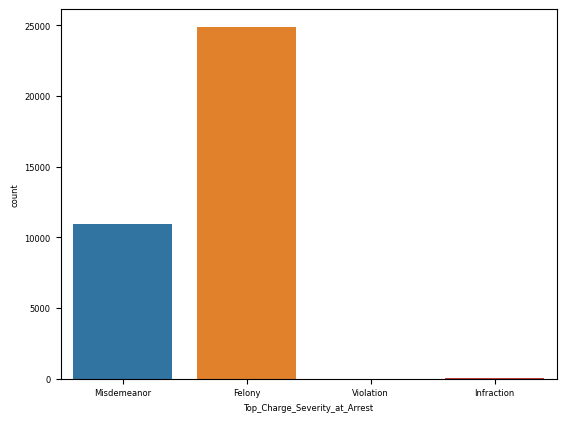

In [41]:
ax = sns.countplot(x="Top_Charge_Severity_at_Arrest",
                   data=final_bail_amt)

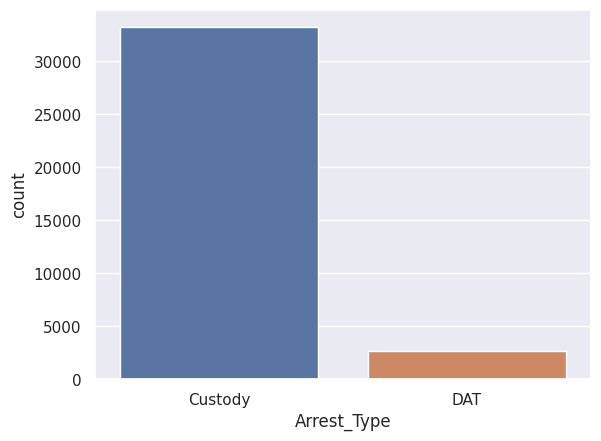

In [42]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Arrest_Type", data=final_bail_amt)

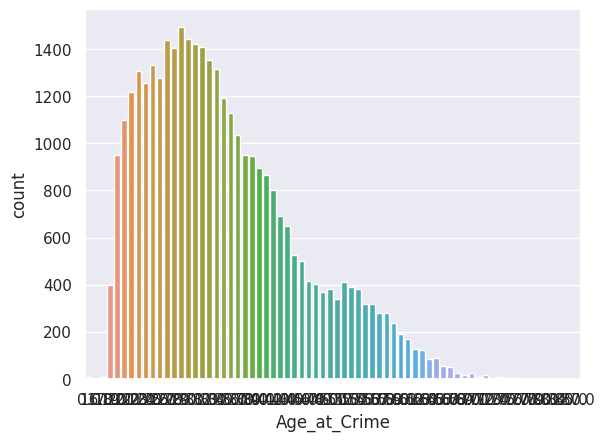

In [43]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Age_at_Crime", data=final_bail_amt)

In [44]:
std_value = final_bail_amt["Bail_Amount"].std()
mean_value = final_bail_amt["Bail_Amount"].mean()

In [45]:
add = (2*std_value) + mean_value
minus = mean_value - (2*std_value)

In [46]:
add_outlier_filter = (final_bail_amt["Bail_Amount"]<=add)
minus_outlier_filter = (final_bail_amt["Bail_Amount"]>=minus)

final_bail_amt = final_bail_amt[add_outlier_filter]
final_bail_amt = final_bail_amt[minus_outlier_filter]

<ipython-input-46-b0969656651f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_bail_amt = final_bail_amt[minus_outlier_filter]


In [47]:
final_bail_amt.agg(["max", "min","median"])

<ipython-input-47-8d3c87b331c1>:1: FutureWarning: ['Race', 'Court_ORI', 'Judge_Name', 'Arrest_Type', 'Top_Arrest_Article_Section', 'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest', 'Top_Charge_Weight_at_Arrest', 'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category', 'Representation_Type', 'Def_Attended_Sched_Pretrials', 'Release Decision at Arraign'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  final_bail_amt.agg(["max", "min","median"])


,Gender,Race,Age_at_Crime,Age_at_Arrest,Court_ORI,Judge_Name,Arrest_Type,Top_Arrest_Article_Section,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind,Arraign Charge Category,Representation_Type,Def_Attended_Sched_Pretrials,Release Decision at Arraign,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,Year
max,1.0,White,87.0,87.0,NY062033J,"Zuckerman, David S.",DAT,600,VTL 1229-C 03 I Seat Belt Violation-Driver,Violation,V,Y,Unlicensed Operation,Self Represented,NaN,Bail-set,2.0,4.0,10.0,10000000.0,87.0,1.0,2021.0
min,1.0,American Indian/Alaskan Native,0.0,0.0,NY001011J,"Abriano, Gerianne",Custody,0168-F,AC 10-131 (I)(3) UM Possession of Ammunition,Felony,AF,N,Aggravated Harassment,18B (Assigned Counsel),NaN,Bail-set,0.0,0.0,0.0,1.0,0.0,0.0,2018.0
median,1.0,NaN,32.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,10000.0,32.0,0.0,2020.0


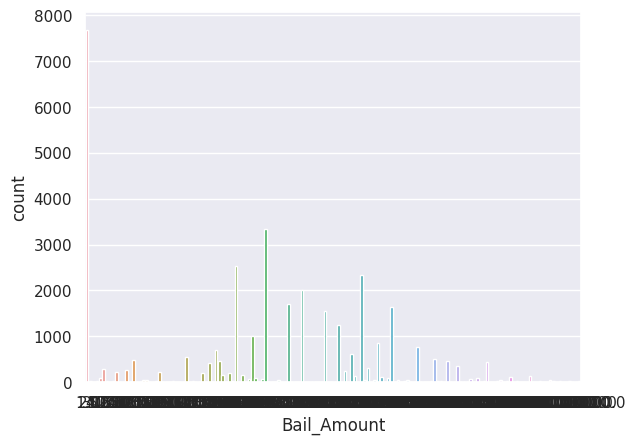

In [48]:
ax = sns.countplot(x="Bail_Amount", data=final_bail_amt)

Model Preprocessing

In [49]:
# Top_Arrest_Article_Section Dummies
final_bail_amt = pd.concat([final_bail_amt,pd.get_dummies(final_bail_amt['Top_Charge_at_Arrest'], prefix='law')],axis=1).drop(['Top_Arrest_Article_Section'],axis=1)

In [50]:
# Race Dummies
final_bail_amt = pd.concat([final_bail_amt,pd.get_dummies(final_bail_amt['Race'], prefix='Race')],axis=1).drop(['Race'],axis=1)


In [51]:
#Charge Type Dummies
final_bail_amt = pd.concat([final_bail_amt,pd.get_dummies(final_bail_amt['Arraign Charge Category'], prefix='Charge')],axis=1).drop(['Arraign Charge Category'],axis=1)

In [52]:
# Charge Severity Dummies
final_bail_amt = pd.concat([final_bail_amt,pd.get_dummies(final_bail_amt['Top_Charge_Severity_at_Arrest'], prefix='Severity')],axis=1).drop(['Top_Charge_Severity_at_Arrest'],axis=1)

In [53]:
# Court ORI Dummies
final_bail_amt = pd.concat([final_bail_amt,pd.get_dummies(final_bail_amt['Court_ORI'], prefix='Court')],axis=1).drop(['Court_ORI'],axis=1)

In [54]:
final_bail_amt["Top_Charge_at_Arrest"].value_counts()
final_bail_amt.dtypes

Gender               int64
Age_at_Crime       float64
Age_at_Arrest      float64
Judge_Name          object
Arrest_Type         object
                    ...   
Court_NY059031J      uint8
Court_NY059041J      uint8
Court_NY059051J      uint8
Court_NY059691J      uint8
Court_NY062033J      uint8
Length: 768, dtype: object

In [55]:
final_bail_amt.shape

(35866, 768)

In [56]:
final_bail_amt.columns

Index(['Gender', 'Age_at_Crime', 'Age_at_Arrest', 'Judge_Name', 'Arrest_Type',
       'Top_Charge_at_Arrest', 'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Representation_Type',
       'Def_Attended_Sched_Pretrials',
       ...
       'Court_NY054011J', 'Court_NY055011J', 'Court_NY056011J',
       'Court_NY059011J', 'Court_NY059021J', 'Court_NY059031J',
       'Court_NY059041J', 'Court_NY059051J', 'Court_NY059691J',
       'Court_NY062033J'],
      dtype='object', length=768)

In [57]:
#remove additional features for this model (Sparse points)
extra_features =['Age_at_Crime', 'Age_at_Arrest',
       'Judge_Name', 'Arrest_Type', 'Top_Charge_at_Arrest_Violent_Felony_Ind',
       'Representation_Type',"Top_Charge_at_Arrest", "Top_Charge_Weight_at_Arrest",
       'Release Decision at Arraign','Year']

In [58]:
df_model_feeder = pd.DataFrame(final_bail_amt.drop(extra_features, axis=1))

In [59]:
df_model_feeder.head()

,Gender,Def_Attended_Sched_Pretrials,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM 

In [60]:
# Change bail amount to quantile to predict quantile bail

df_model_feeder["Bail_Pct"] = df_model_feeder["Bail_Amount"].rank(pct=True)


                                         Bail Percentile vs. Bail Amount


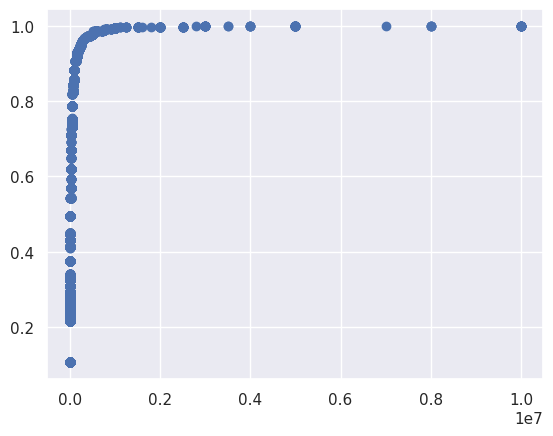

In [61]:
import matplotlib as plt

plt.pyplot.scatter(x=df_model_feeder["Bail_Amount"], y= df_model_feeder["Bail_Pct"])
print("                                         Bail Percentile vs. Bail Amount")

In [62]:
df_model_feeder = df_model_feeder.drop(["Bail_Amount"],axis=1)


In [63]:
df_model_feeder["Def_Attended_Sched_Pretrials"] = df_model_feeder["Def_Attended_Sched_Pretrials"].apply(pd.to_numeric)

In [64]:
df_model_feeder.head()

,Gender,Def_Attended_Sched_Pretrials,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Age,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larcen

Model

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#list of columns
cols_to_scale = ['Age','Def_Attended_Sched_Pretrials',"prior_vfo_cnt",
                 "prior_nonvfo_cnt", "prior_misd_cnt"]

scaler = StandardScaler()
scaler.fit(df_model_feeder[cols_to_scale])

#scale  data
df_model_feeder[cols_to_scale] = scaler.transform(df_model_feeder[cols_to_scale])


In [66]:
df_model_feeder.head(2)

,Gender,Def_Attended_Sched_Pretrials,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Age,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larcen

In [67]:
X = df_model_feeder.drop(["Bail_Pct"],axis=1)
y = df_model_feeder["Bail_Pct"]


In [68]:
#Test_Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [69]:
df_model_feeder_2 = df_model_feeder.drop(labels=["Def_Attended_Sched_Pretrials",
                                                 "prior_vfo_cnt", "prior_nonvfo_cnt",
                                                "prior_misd_cnt", "Age"], axis=1)

In [70]:
df_model_feeder_2.head()

,Gender,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larceny,law_PL 110-155.30 01 AM Gr Lar 4:Value Property >$1000,law_PL 110-155.30 05 A

In [71]:
X2 = df_model_feeder_2.drop(["Bail_Pct"],axis=1)
y2 = df_model_feeder_2["Bail_Pct"]


In [72]:
#Test_Train Split
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)


Linear Model

In [73]:
# Define Model
from sklearn.linear_model import LinearRegression

## Linear Regression
lr_model = LinearRegression()

#Fit model
lr_model.fit(X_train, y_train)



LinearRegression()

In [74]:
# Predicted Y test values
predicted_y_test = lr_model.predict(X_test)


In [75]:
# Linear Regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, lr_model.predict(X_test))
r2 = r2_score(y_test, lr_model.predict(X_test))
print(lr_model, "Mean Squared Error is :", mse,  "r2 is :", r2)

LinearRegression() Mean Squared Error is : 6.950283441536962e+18 r2 is : -8.362228404040309e+19


Linear Regression ( No age, priors, pretrial)

In [76]:
# Define Model
from sklearn.linear_model import LinearRegression

## Linear Regression
lr_model = LinearRegression()

#Fit model
lr_model.fit(X_train2, y_train2)



LinearRegression()

In [77]:
# Predicted Y test values
predicted_y_test2 = lr_model.predict(X_test2)


In [78]:
# Linear Regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test2, lr_model.predict(X_test2))
r2 = r2_score(y_test2, lr_model.predict(X_test2))
print(lr_model, "Mean Squared Error is :", mse,  "r2 is :", r2)

LinearRegression() Mean Squared Error is : 2.4994588369169252e+20 r2 is : -3.042231583411607e+21


Decision Tree Regressor

In [79]:
# Decision Tree Regressor
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [80]:
# Predict tree regressor
clf_predicted_y_train= clf.predict(X_train)

In [81]:
# Decision Tree Regressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, clf.predict(X_test))
r2 = r2_score(y_test, clf.predict(X_test))
print(clf,"     ","mse:", mse, "     ", "r2:", r2)

DecisionTreeRegressor()       mse: 0.06643128075622728       r2: 0.20073253482500297


Decision Tree Regressor (No age, prios, pretrial)

In [82]:
# Decision Tree Regressor
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train2, y_train2)

In [83]:
# Predict tree regressor
clf_predicted_y_train2 = clf.predict(X_train2)

In [84]:
# Decision Tree Regressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, clf.predict(X_test2))
r2 = r2_score(y_test2, clf.predict(X_test2))
print(clf,"     ","mse:", mse, "     ", "r2:", r2)

DecisionTreeRegressor()       mse: 0.04463458242755976       r2: 0.4567274548877708


K Nearest Neighbors Regression

In [85]:
# K Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()



In [86]:
knn = knn.fit(X_train, y_train)

In [87]:
# K neighbors regression score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, knn.predict(X_test))
r2 = r2_score(y_test, knn.predict(X_test))
print(knn,"     ","mse:", mse, "     ", "r2:", r2)

KNeighborsRegressor()       mse: 0.04509321233472595       r2: 0.4574613478907559


KNN Regression (No Priors, pretrial, age)

In [88]:
# K Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn = knn.fit(X_train2, y_train2)

In [89]:
# Predict
knn_predicted_y_train2 = knn.predict(X_train2)

In [90]:
# K neighbors regression score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, knn.predict(X_test2))
r2 = r2_score(y_test2, knn.predict(X_test2))
print(knn,"     ","mse:", mse, "     ", "r2:", r2)

KNeighborsRegressor()       mse: 0.044173892266211       r2: 0.4623347733133504


SVR Model

In [91]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

svr = SVR()

svr = svr.fit(X_train, y_train)



In [92]:
svr_predicted_y_train = svr.predict(X_train)

In [93]:
# SVR score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, svr.predict(X_test))
r2 = r2_score(y_test, svr.predict(X_test))
print(svr,"     ","mse:", mse, "     ", "r2:", r2)

SVR()       mse: 0.03820058590622487       r2: 0.5403899320034418


SVR (no Age, Pretrial, Priors)

In [94]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

svr = SVR()

svr = svr.fit(X_train2, y_train2)


In [95]:
svr_predicted_y_train = svr.predict(X_train2)

In [96]:
# SVR score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, svr.predict(X_test2))
r2 = r2_score(y_test2, svr.predict(X_test2))
print(svr,"     ","mse:", mse, "     ", "r2:", r2)

SVR()       mse: 0.03886598468063764       r2: 0.5269402945572196
